# Introduction to OpenCV

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual

In [3]:
plt.rcParams["figure.figsize"] = (15,7) # change the plot size of matplotlib

In [4]:
#ls

In [5]:
# Load a color image in grayscale
img_gray = cv.imread('beach.JPG',0)    # this function does not throw an error if the path is not correct!
# TODO: Add information about the flags cv.IMREAD_COLOR, cv.IMREAD_GRAYSCALE and cv.IMREAD_UNCHANGED 

## Displaying images

In [ ]:
# Displaying an image in an image window. The window will be sized according to the image
# Depending on the screen layout the window might be hidden behind your current working window!

cv.imshow('image',img_gray)   # the first argument is the window name
cv.waitKey(0)                 # the window will close after "x" milliseconds, if "0" it waits for any keystroke
cv.destroyAllWindows() 

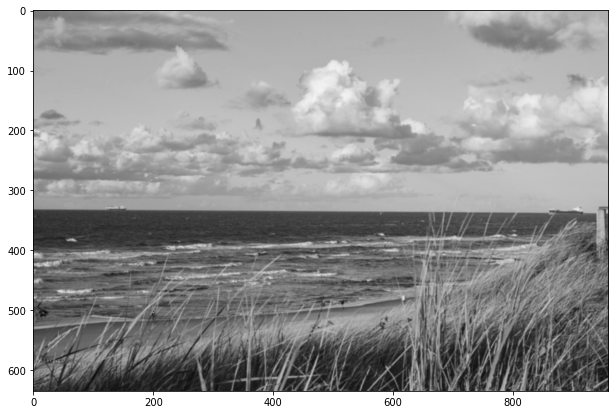

In [5]:
# Displaying an image with matplotlib
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')      # TODO: explanation about interpolation
#plt.xticks([]), plt.yticks([])                                     # to hide tick values on X and Y axis
plt.show()

## Resizing images
interpolations for zooming: 
- cv2.INTER_LINEAR (default)
- cv2.INTER_CUBIC (slow)

interpolation for shringking:
-  cv2.INTER_AREA

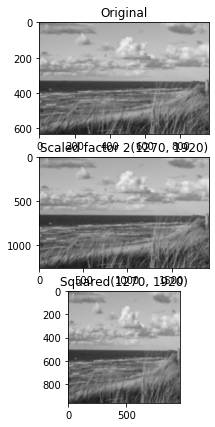

In [19]:
image = img_gray.copy()
height, width = image.shape[:2]
res = cv.resize(image,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

square_img = cv.resize(image,(width, width), interpolation = cv.INTER_CUBIC)

plt.subplot(311),plt.imshow(image, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
plt.subplot(312),plt.imshow(res, cmap = 'gray', interpolation = 'bicubic'), plt.title('Scaled factor 2' + str(res.shape))
plt.subplot(313),plt.imshow(square_img, cmap = 'gray', interpolation = 'bicubic'), plt.title('Squared' + str(res.shape))
plt.show()

## Writing images

In [6]:
cv.imwrite('beachgray.png',img_gray)    # first argument is name of image, second is image
# TODO: Does cv.imwrite() overwrite exisiting files?
# TODO: What are the supported file formats for saving images?

True

## Creating binary images from grayscale image

In [7]:
# @interact                                     # running with interact is too slow
@interact_manual
def display_binary(thresh_val=(0,255,1)):
    _,thresh1 = cv.threshold(img_gray, thresh_val, 255,cv.THRESH_BINARY)
    plt.imshow(thresh1, cmap = 'gray', interpolation = 'bicubic') 
    plt.show()
    return #thresh1; 

interactive(children=(IntSlider(value=127, description='thresh_val', max=255), Button(description='Run Interac…

In [8]:
thresh_val = 138
_, img_binary = cv.threshold(img_gray, thresh_val, 255,cv.THRESH_BINARY)

## 2D Convolution ( Image Filtering )

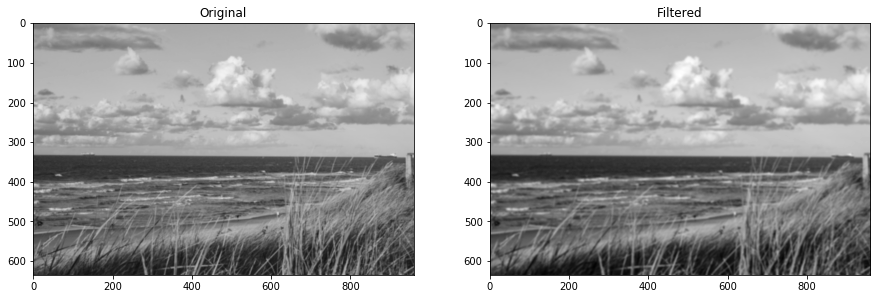

In [9]:
# when ddepth=-1, the output image will have the same depth as the source image
kernel = np.ones((5,5),np.float32)/25
target_img = cv.filter2D(img_gray,-1,kernel)            # image,ddepth, kernel
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
plt.subplot(122),plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic'), plt.title('Filtered')
plt.show()

##  Gaussian blur


Gaussian blurring is highly effective for removing gaussian noise from images.
The kernel size defines the dimensions of the blur. It has to be an **odd** number and minimum size is 3.

In [10]:
@interact_manual
def gaussian_blurred(kernel_size=(3,20,2)):
    gray_blur = cv.GaussianBlur(img_gray, (kernel_size,kernel_size), 0) # img, (kernelsize,kernelsize), standard deviation
    plt.subplot(121),plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
    blur_title = "Gaussian Blur - kernel size: "+ str(kernel_size) 
    plt.subplot(122),plt.imshow(gray_blur, cmap = 'gray', interpolation = 'bicubic'), plt.title(blur_title)
    plt.show()
    return

interactive(children=(IntSlider(value=11, description='kernel_size', max=20, min=3, step=2), Button(descriptio…

## Median blurring
Median blurring is used to removesalt-and-pepper noise from images.

In [ ]:
# TODO: Create an image with salt-and-pepper noise.
# TODO: Implement coding example for median blurring

In [ ]:
!ls

## Bilateral Filters
TODO: write example
gray = cv2.bilateralFilter(gray, 11, 17, 17)

https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed

https://www.pyimagesearch.com/2014/04/21/building-pokedex-python-finding-game-boy-screen-step-4-6/

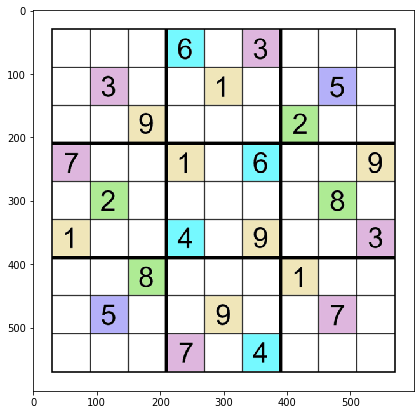

(<matplotlib.image.AxesImage at 0x23fc18b1e48>, None)

In [21]:
sudoku_color = cv.imread('sudoku_color.png',cv.IMREAD_COLOR)
sudoku_gray = cv.imread('sudoku_color.png',0)
plt.imshow(sudoku_color), plt.show()

In [ ]:
plt.imshow(sudoku_gray, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [22]:
@ interact_manual
def show_canny_edge(min_val=(0,255,1)):
    edges = cv.Canny(sudoku_gray,min_val,200)   # image, min_val, max_val
    plt.subplot(121),plt.imshow(sudoku_gray,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

interactive(children=(IntSlider(value=127, description='min_val', max=255), Button(description='Run Interact',…

In [23]:
import numpy as np
import cv2 as cv
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')
# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:                          # use "esc" to close the window TODO: all windows should be closed with the same key
        break
    # get current positions of four trackbarsb
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows() 

# Feature detection
## Harris Corner Detection


In [24]:
#cv.cornerHarris(img_gray, block_size, k_size, k) 
# img_gray: grayscale image, float 32 type
# block_size: size of considered pixel neighbourhood
# k_size: aperture parameter of Sobel derivative
# k: free parameter for Harris Detector where k is an empirically determined constant[0.04,0.06] according to Wikipedia

#img_gray   # TODO: How can you find out the type of an numpy array?
@ interact_manual(block_size=(1,10,1), k_size= (1,31,2), k= (0.04, 0.06, 0.001) )
def harris_corners(block_size=5, k_size= 3, k= 0.06 ):
    sudoku = sudoku_color.copy() 
    #sudoku_gray = 
    gray32 = np.float32(sudoku_gray)
    corners = cv.cornerHarris(gray32, block_size,k_size, k)
    
    # dilate the corners for better contrast
    corners = cv.dilate(corners,None)
    
    
    # Threshold for an optimal value, it may vary depending on the image.
    sudoku[corners>0.01*corners.max()]=[0,0,255]
    
    plt.subplot(121),plt.imshow(sudoku,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(corners,cmap = 'gray')
    plt.title('Harris Corner Detection'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

# TODO: k is only changing on 0.01 scale

interactive(children=(IntSlider(value=5, description='block_size', max=10, min=1), IntSlider(value=3, descript…

## Canny edge detection
Canny edge detection is a popular multistage edge detection algorithm.
- Stage 1: Noise Reduction
- Stage 2: Finding intensity edge gradients of the image
- Stage 3: Non-maximum Suppression
- Stage 4: Hysteresis thresholding to decide which edges are really edges (minVal, maxVal)

cv.Canny(img_gray, minVal, maxVal, apertureSize = 3)

In [25]:
@interact_manual(minVal=(0,255,1), maxVal=(0,255,1))
def canny_edges(minVal=100, maxVal=200):
    edges = cv.Canny(sudoku_gray, minVal, maxVal)

    plt.subplot(121),plt.imshow(sudoku_gray,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
    return

interactive(children=(IntSlider(value=100, description='minVal', max=255), IntSlider(value=200, description='m…

## Video capture
Using cv.VideoCapture(camera_id) requires the correct versions of ffmpeg or gstreamer.

In [ ]:
! conda install -c menpo ffmpeg

In [26]:
cap = cv.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv.imshow('frame',frame)
    if cv.waitKey(1) & 0xFF == ord('q'):         # video capture has to be interrupted by pressing "q"
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows() 


## FAST Algorithm for corner detection
This algorithm is suitable for realtime applications

In [ ]:


# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(sudoku_gray,None)
img2 = cv.drawKeypoints(sudoku_gray, kp, color=(255,0,0), outImage = sudoku_gray)

# Print all default params
print ("Threshold: ", fast.getInt('threshold'))
print ("nonmaxSuppression: ", fast.getBool('nonmaxSuppression'))
print ("neighborhood: ", fast.getInt('type'))
print ("Total Keypoints with nonmaxSuppression: ", len(kp))
